### Matriz de Correlación

Analicemos los coeficientes de correlacion entre el conjunto de variables:
 
Rango de valores:
- 1.0: Correlación positiva perfecta. Ambas variables aumentan o disminuyen juntas.
- 0.0: No hay correlación lineal entre las variables.
- -1.0: Correlación negativa perfecta. Una variable aumenta mientras la otra disminuye.

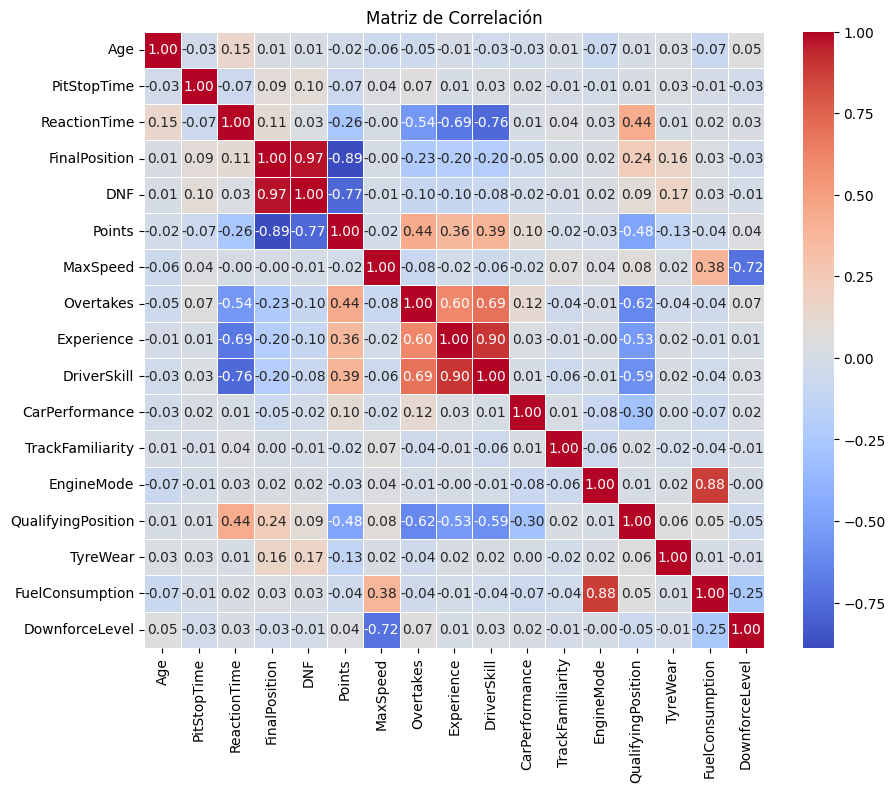

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

f1 = pd.read_csv('formula1_enhanced_data.csv')


# Filtrar columnas numéricas
numeric_columns = f1.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

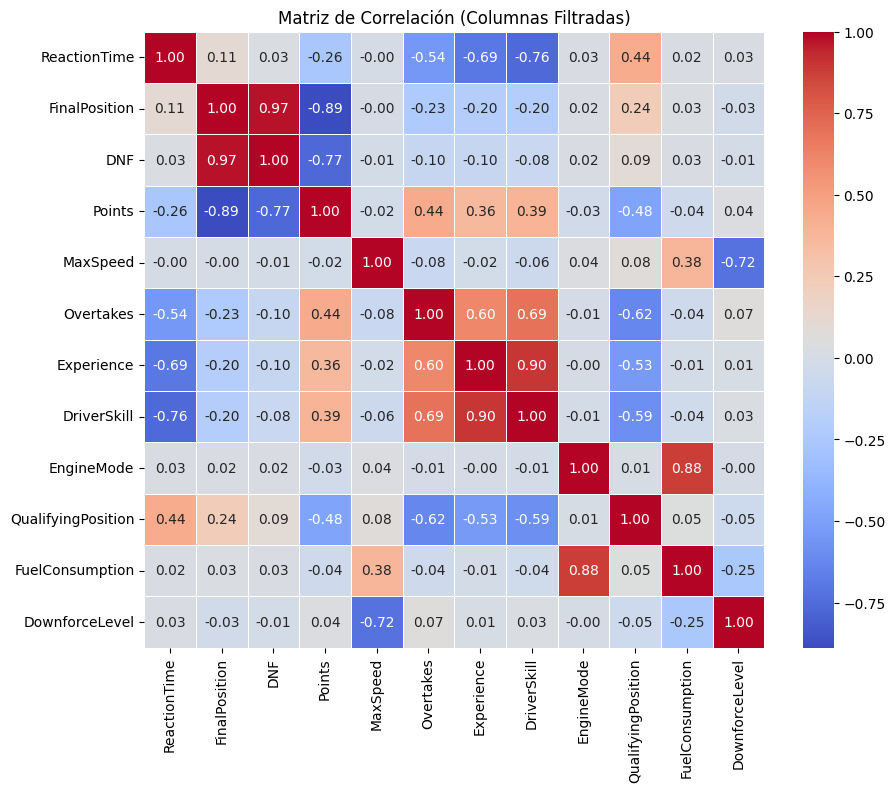

In [7]:
columns_to_exclude = ['Age', 'PitStopTime', 'TrackFamiliarity', 'TyreWear', 'CarPerformance']

# Filtrar columnas numéricas excluyendo las especificadas
numeric_columns_filtered = f1.select_dtypes(include=['number']).drop(columns=columns_to_exclude, axis=1)

# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = numeric_columns_filtered.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Columnas Filtradas)')
plt.show()